In [6]:
%run ~/start_notebook.py

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:1173: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Importing FeatureWorker... mif and mm...
pandas as pd... numpy as np... matplotlib as mpl... pyplot as plt... seaborn as sns...
Start sqlalchemy engine for database (or hit Enter for None): 

No engine initialized. Initialize with:
> db_eng = mif.get_db_engine(db)



In [9]:
%matplotlib inline
sns.set(style="whitegrid")

In [80]:
sal_emp_data = {
    '1gram': 0.204,
    'LIWC': 0.166,
    'topics': 0.177,
    'gen': 0.137,
    'race': None,
    'faith': None,
    '1gram_LIWC': 0.214,
    '1gram_topics': 0.200,
    '1gram_gen': 0.213,
    '1gram_race': 0.154,
    '1gram_faith': 0.157,
    'LIWC_topics': 0.184,
    'gen_race_faith': 0.141,
    '1gram_topics_LIWC': 0.266,
    '1gram_topics_LIWC_gen': 0.206,
    '1gram_gen_race_faith': 0.153,
    '1gram_topics_LIWC_gen_race_faith': 0.217,
}
path_emp_data = {
    '1gram': 0.244,
    'LIWC': 0.182,
    'topics': 0.234,
    'gen': 0.154,
    'race': 0.040,
    'faith': None,
    '1gram_LIWC': 0.250,
    '1gram_topics': 0.245,
    '1gram_gen': 0.230,
    '1gram_race': 0.167,
    '1gram_faith': 0.156,
    'LIWC_topics': 0.236,
    'gen_race_faith': 0.161,
    '1gram_topics_LIWC': 0.267,
    '1gram_topics_LIWC_gen': 0.246,
    '1gram_gen_race_faith': 0.156,
    '1gram_topics_LIWC_gen_race_faith': 0.242,
}

In [84]:
sal = pd.DataFrame(sal_emp_data.items(), columns=['model_sal', 'sal_r'])
path = pd.DataFrame(path_emp_data.items(), columns=['model', 'path_r'])

In [87]:
results = pd.concat([sal, path], axis=1)

In [88]:
results = results[["model", "sal_r", "path_r"]].set_index(["model"]).sort_values("path_r", ascending=False)
results = results.stack()
results = results.reset_index()
results.columns = ['model', 'emp_type', 'r']
results.head()

,model,emp_type,r
0,1gram_topics_LIWC,sal_r,0.266
1,1gram_topics_LIWC,path_r,0.267
2,1gram_LIWC,sal_r,0.214
3,1gram_LIWC,path_r,0.250
4,1gram_topics_LIWC_gen,sal_r,0.206


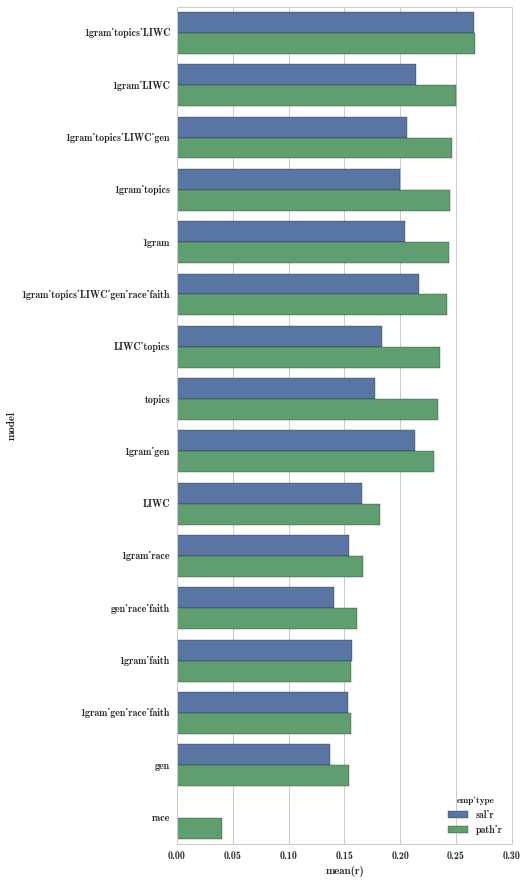

In [89]:
f, ax = plt.subplots(figsize=(6, 15))


# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
#sns.barplot(x="path_r", y="model", data=results,
 #           label="path_r", color="b")

sns.barplot(x="r", y="model", hue="emp_type", data=results)